__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Для парной регрессии коэффициенты вычисляются по формулам:

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Здесь $x$, $y$ — данные из выборки, $\overline{x}$ обозначает выборочное среднее.

In [17]:
x = salary
y = scoring
b1 = ((x*y).mean() - y.mean()*x.mean()) / ((x*x).mean() - x.mean()**2)
b0 = y.mean() - b1*x.mean()
b0, b1

(444.1773573243596, 2.620538882402765)

Методом наименьших квадратов:
$$b = (X^\top X)^{-1} X^\top y.$$

In [18]:
x1 = x[:, np.newaxis] ## x в вектор столбец
x1 = np.insert(x1, 0, 1, axis=1) # столбец единиц для смещения
b = np.linalg.inv(x1.T.dot(x1)).dot(x1.T)@y
b


array([444.17735732,   2.62053888])

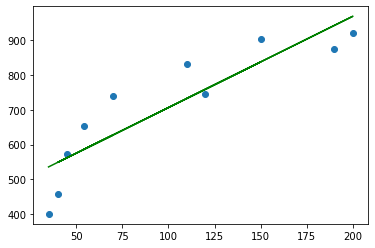

In [19]:
z = x1 @ b
plt.scatter(x, y)
plt.plot(x, z, color='green')
plt.show()

In [20]:
## коэффициент детерминации и средняя ошибка аппроксимации
r2 = z.var() / y.var()
A = np.abs((y - z) / y).mean()
r2, A

(0.7876386635293696, 0.11469251843561705)

Коэффициент довольно высокий 0.79, но ошибка аппроксимации на пределе

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. Соответствующая статистика равна

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$


In [21]:
n = len(y)
k = 1
k1 = k
k2 = n - k - 1
T = (r2 / (1 - r2)) * (k2 / k1)
alpha = 0.05
F_crit = stats.f.ppf(1-alpha, k1, k2)
T, F_crit, T > F_crit

(29.671640859664688, 5.317655071578714, True)

Уравнение статистически значимо

Проверка значимости b0 и b1

In [25]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [28]:
# b1
err_slope = standard_error_slope(x, y, z)
t = stats.t.ppf(1-alpha/2, n-2)
T = b[1]/err_slope
(-t, t), T

((-2.3060041350333704, 2.3060041350333704), 5.4471681504855844)

b1 попадает в критическую область, значит является статистически значимым (гипотеза H0 о незначитмости коэффициента отвергается)

In [29]:
# b0
err_intercept = standard_error_intercept(x, y, z)
T = b[0]/err_intercept
(-t, t), T

((-2.3060041350333704, 2.3060041350333704), 7.866210524668855)

b0 также попадает в критическую область и является статистически значимым

In [30]:
# доверительные интервалы
print("Доверительный интервал для b1")
print((b[1] - t*err_slope, b[1] + t*err_slope))
print("Доверительный интервал для b0")
print((b[0] - t*err_intercept, b[0] + t*err_intercept))

Доверительный интервал для b1
(1.5111599662593744, 3.7299177985461607)
Доверительный интервал для b0
(313.96538048163586, 574.3893341670824)


__Задача 2__

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Если известна <b>дисперсия</b>, то функция Лапласа, иначе квантили Стьюдента